### Call libraries
(#1--#2.0)


In [8]:
# 1.0 Reset memory
#%reset -f
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder as onehot

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder


## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
from sklearn.ensemble import RandomForestClassifier 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

#to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns

# 1.10 To plot pipeline diagram
from sklearn import set_config

In [9]:
# 1.11 Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
# 2.0 Import warnings module
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

# Task-1(Data Pipelining for RFC)

# About the Dataset

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. The target variable 'Y' which is renamed as Recommend where 0 means person will not accept or recomment the coupon and 1 means person will accept the coupon.

# Problem Statement


As the dataset presents a comprehensive set of driving scenarios, encompassing variables such as destination, current time, weather conditions, and the presence of passengers, so we need to develop a machine learning classification tool capable of predicting whether an individual would accept a coupon if they were the driver in a given scenario. By leveraging this dataset, the model aims to discern patterns and relationships between the specified driving conditions and the likelihood of coupon acceptance. The classification algorithm enables the identification of key factors influencing decision-making in accepting coupons, providing valuable insights for targeted marketing strategies and enhancing our understanding of consumer behavior in the context of driving scenarios.

# Objective

The objective of this project is to use Random Forest Classifier as the Supervised Machine Learning Algorithm to create a model for predicting whether an individual as a driver will accept the coupon or not.

In [11]:
#loading the data
df  = pd.read_csv("C://Users//vikas//OneDrive//Desktop//DA End Proejct//T1_in-vehicle-coupon-recommendation.csv")

df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [12]:
#Renaming Y target variable as Recommend
df.rename(columns = {'Y':'Recommend'}, inplace = True)

In [17]:
df.shape

(12684, 26)

In [18]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Recommend                2
dtype: int64

In [19]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Recommend                   0
dtype: int64

In [20]:
#Dropped toCoupon_GEQ5min column, as it is having a single value
df=df.drop(['toCoupon_GEQ5min'], axis=1)
df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Recommend
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0


In [21]:
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

As there are two feature as string, so changing 50plus as 55 and below21 as 18, to make it completely numeric

In [22]:
df['age']=df['age'].replace('50plus', 55)
df['age']=df['age'].replace('below21', 18)

In [23]:
df['age'].value_counts()

21    2653
26    2559
31    2039
55    1788
36    1319
41    1093
46     686
18     547
Name: age, dtype: int64

In [24]:
Y = df['Recommend']
X = df.drop(['Recommend'], axis=1)

In [25]:
#  Spliting dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, Y_train, Y_test = train_test_split(
                                                    X,                   # Data features
                                                    Y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )

In [26]:
num_cols = ['temperature', 'age']

In [27]:
cat_cols_mf=['car','CarryAway','RestaurantLessThan20','Restaurant20To50','Bar','CoffeeHouse']

In [28]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Recommend'],
      dtype='object')

In [29]:
cat_cols_ohe=['destination', 'passanger', 'weather', 'time', 'coupon',
       'expiration', 'gender', 'maritalStatus',
       'education', 'occupation', 'income']
#columns= has_children, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Recommend need not to be encoded

In [30]:
#Exploring target variable
df['Recommend'].value_counts()

1    7210
0    5474
Name: Recommend, dtype: int64

Here, by checking target variable feature meaning from kaggle, 0 means coupon is not accepted whereas 1 means coupon is accepted

In [31]:
ohe = onehot(sparse = False)

In [32]:
ss = StandardScaler()

We are using data pipeling to impute the categorical variables via most frequent method and for one hot encoding , to standarize the numerical columns as Pipelining has two advantages:

It avoids intermediate variables

It avoids data leakage

In [33]:
# 10.1 Instantiate Pipeline object for processing
#      cat data. Impute = most_frequent

pipe1  =  Pipeline(
                     [
                      ('mf', SimpleImputer(strategy='most_frequent')),
                      ('ohe', onehot())
                     ]
                   )

In [34]:
# 10.3 Instantiate Pipeline object for 
#      processing numerical data. Standardization

pipe2    = Pipeline(
                     [
                      ('ss', StandardScaler())
                     ]
                  )

In [35]:
# 10.4 Instantiate Pipeline object for 
#      processing cat data. one hot encoding

pipe3 =     Pipeline(
                      [
                       ('ohe', onehot())
                      ]
                    )

In [36]:
# 10.5
# Test transformers:
# Feed data to each pipe to see if it is working
# It is like testing a sub-component
# before full-plumbing is done.
# No error should come.

pipe1.fit_transform(X_train[cat_cols_mf])
pipe2.fit_transform(X_train[num_cols])
pipe3.fit_transform(X_train[cat_cols_ohe])

<10147x30 sparse matrix of type '<class 'numpy.float64'>'
	with 60882 stored elements in Compressed Sparse Row format>

array([[ 0.86732919, -0.600135  ],
       [-0.43900735, -0.600135  ],
       [-0.43900735, -0.600135  ],
       ...,
       [ 0.86732919,  0.26001018],
       [ 0.86732919,  1.89428604],
       [ 0.86732919,  1.89428604]])

<10147x69 sparse matrix of type '<class 'numpy.float64'>'
	with 111617 stored elements in Compressed Sparse Row format>

In [39]:
# 10.6 Collecting all pipes in column transformer
#     along with column names
#     All pipes operate parallely
#                       some-name  transformer     col-names

ct_transformer = ColumnTransformer(
                                    [
                                      ('p_mf',   pipe1,   cat_cols_mf),
                                      ('p_ss',  pipe2,   num_cols),
                                      ('p_ohe', pipe3,   cat_cols_ohe),
                                    ]
                                  )

In [40]:
# 10.7 Test column transformer
ct_transformer.fit_transform(X_train)

<10147x101 sparse matrix of type '<class 'numpy.float64'>'
	with 192793 stored elements in Compressed Sparse Row format>

In [41]:
# 10.8 Final pipeline for transformation and modeling
#     final_pipe is both a 
outer_pipe = Pipeline(
                      [
                       ('ct', ct_transformer),        # Column transformer object
                       ('rfc', RandomForestClassifier()) # Estimator
                      ]
                     )

Train final_pipe on data

In [42]:
outer_pipe.fit(X_train,Y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_mf',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['car', 'CarryAway',
                                                   'RestaurantLessThan20',
                                                   'Restaurant20To50', 'Bar',
                                                   'CoffeeHouse']),
                                                 ('p_ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['temperature', 'age']),
                                                 ('p_ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['destination', 'passanger',
                                                   'weather', 'time', 'coupon',
                                                   'expiration', 'gender',
                                                   'maritalStatus', 'education',
                                                   'occupation', 'income'])])),
                ('rfc', RandomForestClassifier())])

In [44]:
# 11.1 Make prediction on test data
#     Note that there is no need to separately
#     transform X_test. Pipes take care of that

outer_pipe.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [45]:
# 11.2 But what is the actual y_test
Y_test
# le.transform(y_test)

2960     1
11378    0
11025    0
154      1
4168     0
        ..
12663    0
5978     1
11726    1
10513    1
8687     0
Name: Recommend, Length: 2537, dtype: int64

In [46]:
# 11.3 Display pipeline as diagram

from sklearn import set_config
set_config(display='diagram')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_mf',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['car', 'CarryAway',
                                                   'RestaurantLessThan20',
                                                   'Restaurant20To50', 'Bar',
                                                   'CoffeeHouse']),
                                                 ('p_ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['temperature', 'age']),
                                                 ('p_ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['destination', 'passanger',
                                                   'weather', 'time', 'coupon',
                                                   'expiration', 'gender',
                                                   'maritalStatus', 'education',
                                                   'occupation', 'income'])])),
                ('rfc', RandomForestClassifier())])

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
Y_pred=outer_pipe.predict(X_test)

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

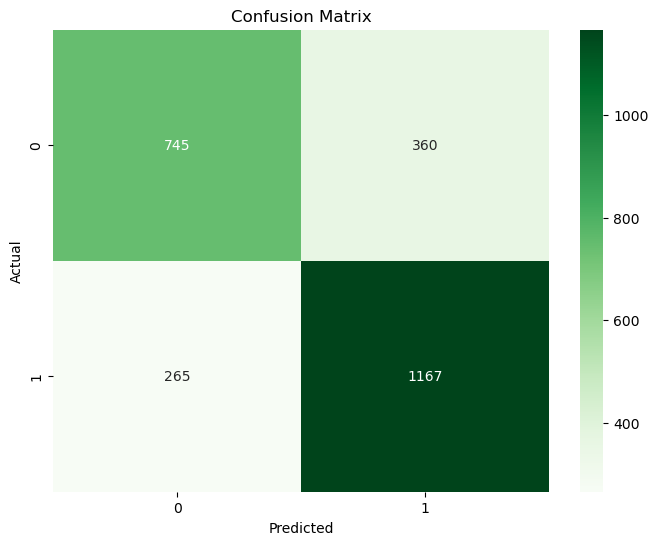

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
# Model evaluation, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7536460386283012
Precision: 0.7642436149312377
Recall: 0.8149441340782123
F1 Score: 0.7887799932409598
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1105
           1       0.76      0.81      0.79      1432

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.75      2537
weighted avg       0.75      0.75      0.75      2537



# Observation

The confusion matrix has four entries: True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN).

True Positive and True Negative means that the model correctly predicted that 745 individuals have not accepted, while 1167 have accpeted the coupon.

False Positive and False Negative indicates that the model incorrectly predicted that 360 drivers have accpeted (when they did not), while 265 individuals did not accepeted (when they did).

The accuracy of approximately 75.37% suggests that the model correctly classified the coupon acceptance or rejection for that proportion of instances in the dataset. The precision of 76.42% implies that when the model predicts acceptance, it is correct about 76.42% of the time. The recall of 81.49% indicates that the model captures 81.49% of the instances where the actual outcome is acceptance. The F1 Score, a harmonic mean of precision and recall, is 78.88%, reflecting a balanced trade-off between precision and recall.

# Classification from new sample via prediction

In [49]:
new_df=pd.read_csv("C://Users//vikas//OneDrive//Desktop//DA End Proejct//T1_New Data.csv")
new_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,40,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1
1,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Male,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
2,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0


In [50]:
#Dropped toCoupon_GEQ5min column, as it is having a single value
new_df=new_df.drop(['toCoupon_GEQ5min'], axis=1)
new_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,40,Unmarried partner,...,crossover,never,never,1~3,4~8,1~3,1,0,0,1
1,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Male,21,Unmarried partner,...,NaN,never,never,NaN,4~8,1~3,1,0,0,1
2,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,never,never,1~3,4~8,1~3,0,0,1,0


In [51]:
outer_pipe.predict(new_df)

array([1, 1, 1], dtype=int64)

The objective of using samle new data point is to forecast whether a individual will accept the coupon (1) or not(0). With the given combination of features for 3 data points, our model predicted all three person will accept the coupon for the given attributes.

# Conclusion

We leveraged a Random Forest Classifier to develop a predictive model for determining whether individuals, acting as drivers in various scenarios, would accept or reject coupons. The dataset, encompassed diverse driving conditions such as destination, current time, weather, and passenger presence. Employing a data pipeline for categorical variable imputation and one-hot encoding, we aimed to enhance model performance and prevent data leakage. The confusion matrix revealed that the model achieved 75.37% accuracy, correctly predicting coupon acceptance or rejection. Precision, recall, and F1 Score metrics further demonstrated a balanced trade-off between correctly identifying acceptance instances and avoiding false positives. The model's ability to generalize to new data points was tested, showing promising results.

# Task-2 (k-Means)

#online retail

# About the Dataset

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.The dataset given provides transaction information, including product information, quantities, pricing, customer IDs, and country.

# Problem Statement

As dataset includes information such as product details, quantities, pricing, customer IDs, and country. By employing K-means clustering, the goal is to identify homogeneous clusters of transactions based on shared characteristics, providing valuable insights into customer behavior, purchasing trends, and potential market segments. This clustering approach aims to enhance the company's understanding of its customer base, supporting targeted marketing strategies, and refining its business approach for different customer segments within the realm of online retail.

# Objective

The objective is to apply K-means clustering to uncover distinct patterns and groupings within the online retail transactions conducted by a UK-based company selling unique all-occasion gifts.

In [5]:
#loading the data
df1 = pd.read_csv("C://Users//vikas//OneDrive//Desktop//DA End Proejct//T2_Online Retail.csv",encoding_errors='ignore')

In [6]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
# Size of the dataset
df1.shape

(541909, 8)

In [8]:
#Finding out missing values in each column
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#Finding number of unique values in each column
df1.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [12]:
# Dropped Columns InvoiceNo, StockCode, Description, InvoiceDate, CustomerID
df1 = df1.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID'], axis=1)

In [13]:
df1.head(2)

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom


In [14]:
#Performed label encoding on the categorical column country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df1['Country']=le.fit_transform(df1['Country'])

In [16]:
df1.head(4)

,Quantity,UnitPrice,Country
0,6,2.55,36
1,6,3.39,36
2,8,2.75,36
3,6,3.39,36


In [17]:
#Performed feature scaling on the numerical columns Quantity and Unitprice
sc=StandardScaler()

In [18]:
df1['Quantity']=sc.fit_transform(df1[['Quantity']])
df1['UnitPrice']=sc.fit_transform(df1[['UnitPrice']])

In [19]:
df1.head()

,Quantity,UnitPrice,Country
0,-0.016289,-0.021301,36
1,-0.016289,-0.012620,36
2,-0.007118,-0.019234,36
3,-0.016289,-0.012620,36
4,-0.016289,-0.012620,36


Created a new DataFrame 'df2' containing a random sample of 10,000 rows from the original DataFrame 'df1', as original dataset is having 5 lakh+ data points.

In [20]:
df2=df1.sample(n=10000)

<BarContainer object of 16 artists>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhouette Score')

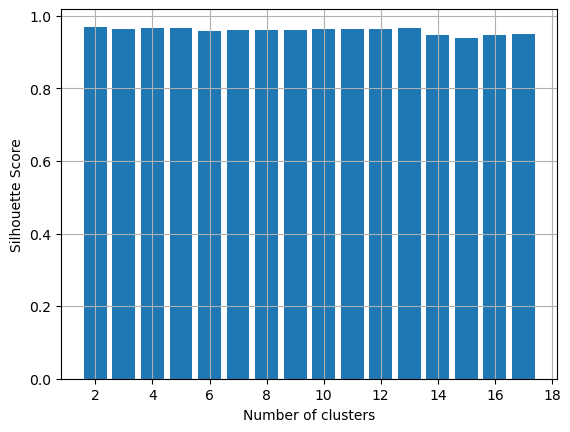

In [24]:
# To calculate and visualize Silhouette Scores for different K-Means cluster numbers
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,18):
    silhouette_scores.append( 
        silhouette_score(df2, KMeans(n_clusters = n_cluster).fit_predict(df2))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

As for k=2, we are having highest silhouette score, so we will consider number of cluster as 2
# k=2

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(df2, KMeans(n_clusters =2).fit_predict(df2))

0.9696327081024924

In [25]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df2)

In [26]:
clusters

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
df2["Cluster"] = clusters

In [28]:
df2.head()

,Quantity,UnitPrice,Country,Cluster
328185,0.011224,-0.030603,14,1
365620,-0.034630,-0.034737,36,0
154511,-0.025460,0.003502,36,0
526011,-0.016289,-0.025952,36,0
254903,-0.007118,-0.022231,36,0


Two clusters labeled as 1 and 0 has been formed by applying k-means clustering, which implies the similar shopping behavior of individuals have been put into same cluster, which can help company to identify the behaviour of any new customer based on these two clusters.

# Conclusion


In addressing the objective of employing K-means clustering to gain insights into online retail transactions for a UK-based company selling unique gifts, a new DataFrame 'df2' was created, comprising a random sample of 10,000 rows from the original dataset 'df1,' which had over 500,000 data points. Through the application of K-means clustering, the optimal number of clusters, determined by the highest silhouette score, was found to be 2. The silhouette score of 0.9696 indicates a high degree of cohesion within clusters and separation between them. This clustering analysis allows the company to discern distinct patterns in customer behavior and purchasing trends, facilitating a more nuanced understanding of its customer base.